In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuração para melhorar a visualização dos gráficos no Jupyter/Colab
%matplotlib inline
sns.set_style('darkgrid')

In [109]:
dados = pd.read_excel('Base de dados Atividade Prática.xlsx')
data_linhas = dados.iloc[1:12]

In [110]:
data_linhas.columns = data_linhas.iloc[0]
data_linhas = data_linhas[1:]
data_linhas

1,Produto,Vendas (R$),Custos (R$),Região,Mês
2,Camiseta,12500,7000,São Paulo,Janeiro
3,Calça Jeans,9800,5500,Rio de Janeiro,Janeiro
4,Jaqueta,15300,9800,Minas Gerais,Janeiro
5,Sapato,8700,4200,Paraná,Janeiro
6,Bolsa,6900,3800,Bahia,Janeiro
7,Camiseta,14200,7800,São Paulo,Fevereiro
8,Calça Jeans,11400,6200,Rio de Janeiro,Fevereiro
9,Jaqueta,16800,10500,Minas Gerais,Fevereiro
10,Sapato,7900,4000,Paraná,Fevereiro
11,Bolsa,9600,5200,Bahia,Fevereiro


In [111]:
data_linhas.rename(columns={'Vendas (R$)': 'Vendas', 'Custos (R$)': 'Custos'}, inplace=True)
data_linhas

1,Produto,Vendas,Custos,Região,Mês
2,Camiseta,12500,7000,São Paulo,Janeiro
3,Calça Jeans,9800,5500,Rio de Janeiro,Janeiro
4,Jaqueta,15300,9800,Minas Gerais,Janeiro
5,Sapato,8700,4200,Paraná,Janeiro
6,Bolsa,6900,3800,Bahia,Janeiro
7,Camiseta,14200,7800,São Paulo,Fevereiro
8,Calça Jeans,11400,6200,Rio de Janeiro,Fevereiro
9,Jaqueta,16800,10500,Minas Gerais,Fevereiro
10,Sapato,7900,4000,Paraná,Fevereiro
11,Bolsa,9600,5200,Bahia,Fevereiro


In [112]:
# Obter informações sobre as colunas, tipos de dados e valores nulos
print(data_linhas.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 2 to 11
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Produto  10 non-null     object
 1   Vendas   10 non-null     object
 2   Custos   10 non-null     object
 3   Região   10 non-null     object
 4   Mês      10 non-null     object
dtypes: object(5)
memory usage: 532.0+ bytes
None


In [113]:
# Convertendo múltiplas colunas com um dicionário
df_vendas = data_linhas.astype({
    'Vendas': int,      # IDs devem ser texto para evitar cálculos
    'Custos': int,      # 0 se torna False, 1 se torna True
})

df_vendas

1,Produto,Vendas,Custos,Região,Mês
2,Camiseta,12500,7000,São Paulo,Janeiro
3,Calça Jeans,9800,5500,Rio de Janeiro,Janeiro
4,Jaqueta,15300,9800,Minas Gerais,Janeiro
5,Sapato,8700,4200,Paraná,Janeiro
6,Bolsa,6900,3800,Bahia,Janeiro
7,Camiseta,14200,7800,São Paulo,Fevereiro
8,Calça Jeans,11400,6200,Rio de Janeiro,Fevereiro
9,Jaqueta,16800,10500,Minas Gerais,Fevereiro
10,Sapato,7900,4000,Paraná,Fevereiro
11,Bolsa,9600,5200,Bahia,Fevereiro


In [114]:
# Por favor, execute este comando no seu DataFrame original
print(df_vendas.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 2 to 11
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Produto  10 non-null     object
 1   Vendas   10 non-null     int32 
 2   Custos   10 non-null     int32 
 3   Região   10 non-null     object
 4   Mês      10 non-null     object
dtypes: int32(2), object(3)
memory usage: 452.0+ bytes
None


In [115]:
soma_vendas_por_produto = df_vendas.groupby('Produto')[['Vendas']].sum()
soma_vendas_por_produto

1,Vendas
Produto,
Bolsa,16500
Calça Jeans,21200
Camiseta,26700
Jaqueta,32100
Sapato,16600


In [116]:
soma_custo_por_produto = df_vendas.groupby('Produto')[['Custos']].sum()
soma_custo_por_produto

1,Custos
Produto,
Bolsa,9000
Calça Jeans,11700
Camiseta,14800
Jaqueta,20300
Sapato,8200


In [117]:
merge_custo_vendas = soma_vendas_por_produto.merge(soma_custo_por_produto, on='Produto').reset_index()
merge_custo_vendas

1,Produto,Vendas,Custos
0,Bolsa,16500,9000
1,Calça Jeans,21200,11700
2,Camiseta,26700,14800
3,Jaqueta,32100,20300
4,Sapato,16600,8200


In [118]:
merge_custo_vendas['Lucro'] = merge_custo_vendas['Vendas'] - merge_custo_vendas['Custos']
merge_custo_vendas

1,Produto,Vendas,Custos,Lucro
0,Bolsa,16500,9000,7500
1,Calça Jeans,21200,11700,9500
2,Camiseta,26700,14800,11900
3,Jaqueta,32100,20300,11800
4,Sapato,16600,8200,8400


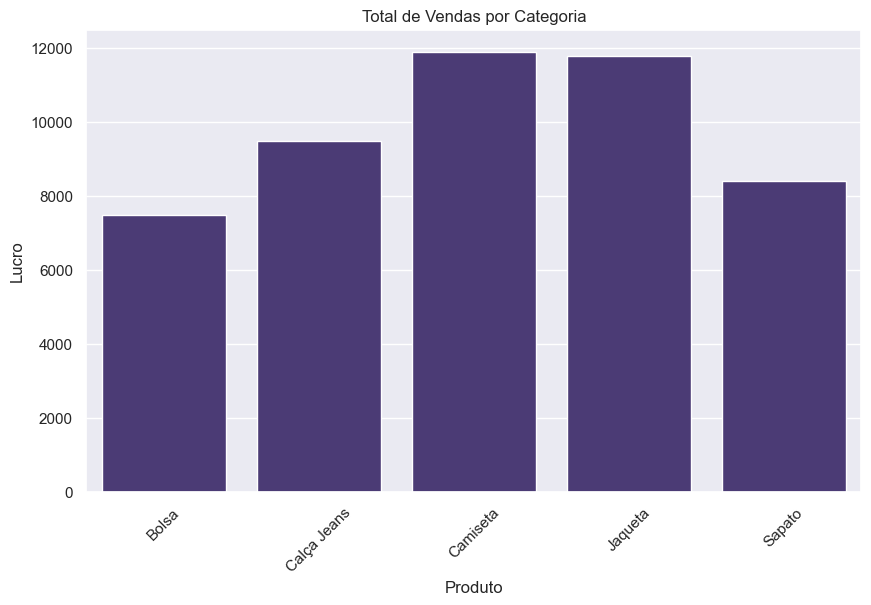

In [119]:
# Usando Seaborn para um visual mais agradável
plt.figure(figsize=(10, 6))
sns.barplot(x='Produto', y='Lucro', data=merge_custo_vendas)
plt.title('Total de Vendas por Categoria')
plt.xticks(rotation=45) # Rotaciona os labels do eixo x
plt.show()


In [120]:
df_vendas

1,Produto,Vendas,Custos,Região,Mês
2,Camiseta,12500,7000,São Paulo,Janeiro
3,Calça Jeans,9800,5500,Rio de Janeiro,Janeiro
4,Jaqueta,15300,9800,Minas Gerais,Janeiro
5,Sapato,8700,4200,Paraná,Janeiro
6,Bolsa,6900,3800,Bahia,Janeiro
7,Camiseta,14200,7800,São Paulo,Fevereiro
8,Calça Jeans,11400,6200,Rio de Janeiro,Fevereiro
9,Jaqueta,16800,10500,Minas Gerais,Fevereiro
10,Sapato,7900,4000,Paraná,Fevereiro
11,Bolsa,9600,5200,Bahia,Fevereiro


In [121]:
soma_vendas_por_regiao = df_vendas.groupby('Região')[['Vendas']].sum().reset_index()
soma_custos_por_regiao = df_vendas.groupby('Região')[['Custos']].sum().reset_index()
merge_custo_vendas_regiao = soma_vendas_por_regiao.merge(soma_custos_por_regiao, on='Região')
merge_custo_vendas_regiao['Lucro'] = merge_custo_vendas_regiao['Vendas'] - merge_custo_vendas_regiao['Custos']
merge_custo_vendas_regiao

1,Região,Vendas,Custos,Lucro
0,Bahia,16500,9000,7500
1,Minas Gerais,32100,20300,11800
2,Paraná,16600,8200,8400
3,Rio de Janeiro,21200,11700,9500
4,São Paulo,26700,14800,11900


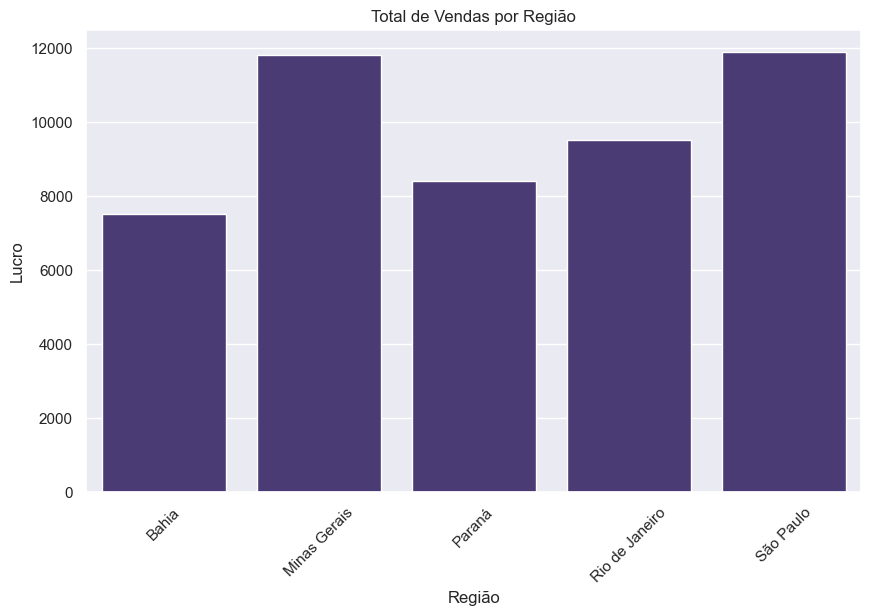

In [122]:
# Usando Seaborn para um visual mais agradável
plt.figure(figsize=(10, 6))
sns.barplot(x='Região', y='Lucro', data=merge_custo_vendas_regiao)
plt.title('Total de Vendas por Região')
plt.xticks(rotation=45) # Rotaciona os labels do eixo x
plt.show()


In [123]:
# Agrupar e aplicar múltiplas agregações
agregacoes = df_vendas.groupby('Região').agg({
    'Vendas': 'sum',
    'Custos': 'mean',
    'Produto': 'count'
})
print(agregacoes)

1               Vendas   Custos  Produto
Região                                  
Bahia            16500   4500.0        2
Minas Gerais     32100  10150.0        2
Paraná           16600   4100.0        2
Rio de Janeiro   21200   5850.0        2
São Paulo        26700   7400.0        2


In [124]:
soma_vendas_por_regiao['%'] = round(soma_vendas_por_regiao['Vendas'] / sum(soma_vendas_por_regiao['Vendas']) * 100, 2)
soma_vendas_por_regiao = soma_vendas_por_regiao.sort_values(by='%', ascending=False).reset_index(drop=True)
soma_vendas_por_regiao

1,Região,Vendas,%
0,Minas Gerais,32100,28.38
1,São Paulo,26700,23.61
2,Rio de Janeiro,21200,18.74
3,Paraná,16600,14.68
4,Bahia,16500,14.59


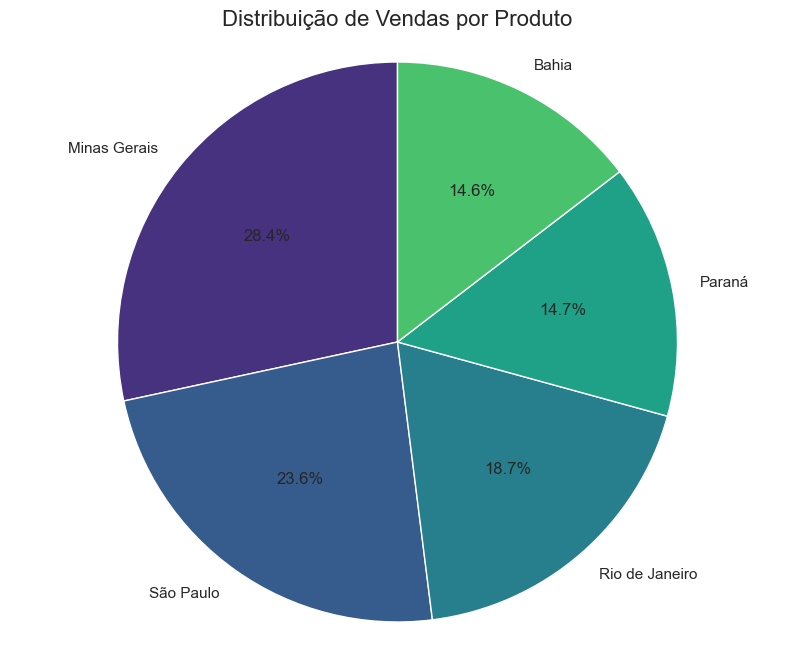

In [125]:
# 3. Criando o Gráfico de Pizza
# Define o estilo do seaborn para um visual mais moderno
sns.set_theme(style="whitegrid", palette="viridis")

plt.figure(figsize=(10, 8)) # Define o tamanho da figura

# A função principal do Matplotlib para o gráfico de pizza
plt.pie(
    x=soma_vendas_por_regiao['%'].values,            # Os valores (fatias da pizza)
    labels=soma_vendas_por_regiao['Região'],        # Os rótulos de cada fatia
    autopct='%1.1f%%',                    # Formato para mostrar a porcentagem em cada fatia (ex: 25.1%)
    startangle=90                         # Ângulo inicial para a primeira fatia (90 graus deixa a primeira fatia no topo)
)

plt.title('Distribuição de Vendas por Produto', fontsize=16) # Adiciona um título

# plt.axis('equal') garante que a pizza seja um círculo perfeito
plt.axis('equal')

plt.show() # Mostra o gráfico

In [126]:
df_vendas

1,Produto,Vendas,Custos,Região,Mês
2,Camiseta,12500,7000,São Paulo,Janeiro
3,Calça Jeans,9800,5500,Rio de Janeiro,Janeiro
4,Jaqueta,15300,9800,Minas Gerais,Janeiro
5,Sapato,8700,4200,Paraná,Janeiro
6,Bolsa,6900,3800,Bahia,Janeiro
7,Camiseta,14200,7800,São Paulo,Fevereiro
8,Calça Jeans,11400,6200,Rio de Janeiro,Fevereiro
9,Jaqueta,16800,10500,Minas Gerais,Fevereiro
10,Sapato,7900,4000,Paraná,Fevereiro
11,Bolsa,9600,5200,Bahia,Fevereiro


In [127]:
# Qual o total de vendas e custos?

total_vendas = sum(df_vendas['Vendas'])
total_custos = sum(df_vendas['Custos'])

print(f'Total de vendas é: R${total_vendas}')
print(f'Total de custos é: R${total_custos}')

Total de vendas é: R$113100
Total de custos é: R$64000


In [128]:
# Qual produto teve o maior volume de vendas em um único mês? E o menor?

janeiro = df_vendas[df_vendas['Mês'] == 'Janeiro']
soma_vendas_por_produto_mes = janeiro.groupby('Produto')[['Vendas']].sum().sort_values(by='Vendas', ascending=False).reset_index()
soma_vendas_por_produto_mes

1,Produto,Vendas
0,Jaqueta,15300
1,Camiseta,12500
2,Calça Jeans,9800
3,Sapato,8700
4,Bolsa,6900


In [129]:
fevereiro = df_vendas[df_vendas['Mês'] == 'Fevereiro']
soma_vendas_por_produto_mes2 = fevereiro.groupby('Produto')[['Vendas']].sum().sort_values(by='Vendas', ascending=False).reset_index()
soma_vendas_por_produto_mes2

1,Produto,Vendas
0,Jaqueta,16800
1,Camiseta,14200
2,Calça Jeans,11400
3,Bolsa,9600
4,Sapato,7900


In [130]:
# Qual a média de vendas por produto?

media_vendas_por_produto = df_vendas.groupby('Produto')[['Vendas']].mean().sort_values(by='Vendas', ascending=False).reset_index()
media_vendas_por_produto

1,Produto,Vendas
0,Jaqueta,16050.0
1,Camiseta,13350.0
2,Calça Jeans,10600.0
3,Sapato,8300.0
4,Bolsa,8250.0


In [131]:
# Crie uma nova coluna chamada 'Lucro (R$)' que seja a diferença entre 'Vendas (R$)' e 'Custos (R$)'.

In [132]:
df_vendas['Lucro'] = df_vendas['Vendas'] - df_vendas['Custos']
df_vendas

1,Produto,Vendas,Custos,Região,Mês,Lucro
2,Camiseta,12500,7000,São Paulo,Janeiro,5500
3,Calça Jeans,9800,5500,Rio de Janeiro,Janeiro,4300
4,Jaqueta,15300,9800,Minas Gerais,Janeiro,5500
5,Sapato,8700,4200,Paraná,Janeiro,4500
6,Bolsa,6900,3800,Bahia,Janeiro,3100
7,Camiseta,14200,7800,São Paulo,Fevereiro,6400
8,Calça Jeans,11400,6200,Rio de Janeiro,Fevereiro,5200
9,Jaqueta,16800,10500,Minas Gerais,Fevereiro,6300
10,Sapato,7900,4000,Paraná,Fevereiro,3900
11,Bolsa,9600,5200,Bahia,Fevereiro,4400


In [133]:
# Qual o produto mais lucrativo? E o menos lucrativo?

soma_vendas_por_produto_lucrativo = df_vendas.groupby('Produto')[['Lucro']].sum().sort_values(by='Lucro', ascending=False).reset_index()
soma_vendas_por_produto_lucrativo

1,Produto,Lucro
0,Camiseta,11900
1,Jaqueta,11800
2,Calça Jeans,9500
3,Sapato,8400
4,Bolsa,7500


In [134]:
merge_custo_vendas

1,Produto,Vendas,Custos,Lucro
0,Bolsa,16500,9000,7500
1,Calça Jeans,21200,11700,9500
2,Camiseta,26700,14800,11900
3,Jaqueta,32100,20300,11800
4,Sapato,16600,8200,8400


In [135]:
# 1. Seu cálculo (está perfeito)
merge_custo_vendas['Margem_Lucro'] =  round((merge_custo_vendas['Lucro'] / merge_custo_vendas['Vendas'] * 100), 2)

# 2. Ordenar e resetar o índice da forma correta
# Adicionamos drop=True para evitar a criação da coluna 'index'
merge_custo_vendas = merge_custo_vendas.sort_values(by='Margem_Lucro', ascending=False).reset_index(drop=True)

# 3. Mostrar o resultado
merge_custo_vendas

1,Produto,Vendas,Custos,Lucro,Margem_Lucro
0,Sapato,16600,8200,8400,50.60
1,Bolsa,16500,9000,7500,45.45
2,Calça Jeans,21200,11700,9500,44.81
3,Camiseta,26700,14800,11900,44.57
4,Jaqueta,32100,20300,11800,36.76


In [136]:
# Qual a receita total por região?
soma_vendas_por_regiao

1,Região,Vendas,%
0,Minas Gerais,32100,28.38
1,São Paulo,26700,23.61
2,Rio de Janeiro,21200,18.74
3,Paraná,16600,14.68
4,Bahia,16500,14.59


In [137]:
# Qual a lucratividade por mês?

lucratividade_por_mes = df_vendas.groupby('Mês').agg({
    'Vendas': 'sum',
    'Custos': 'sum',
})
lucratividade_por_mes = lucratividade_por_mes.reset_index()

# Receita – Custo = Lucro
lucratividade_por_mes['Lucro'] = lucratividade_por_mes['Vendas'] - (lucratividade_por_mes['Custos'])

# (Lucro / Receita Total) x 100
lucratividade_por_mes['Lucratividade'] = round((lucratividade_por_mes['Lucro'] / (lucratividade_por_mes['Vendas'])) * 100, 2)
lucratividade_por_mes

1,Mês,Vendas,Custos,Lucro,Lucratividade
0,Fevereiro,59900,33700,26200,43.74
1,Janeiro,53200,30300,22900,43.05
